__Type of Missing Values__

NaN  : "undefined" (in the mathematical sense), like 0/0, log(-1)

NA   : is generally interpreted as a missing, unknown

NULL : represents the null object

resources: https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

Data source: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

In [65]:
# read Excel file
import pandas as pd

df = pd.read_csv (r"D:\OneDrive - St. Lawrence College\SLC_Class\BDAI\CustSeg.Train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [66]:
# Give information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [67]:
len(df)

8068

In [68]:
# Count the number of missing values

print(df.isnull().sum())

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [69]:
# Find the % of missing values

print( round( 100 * (df.isnull().sum() / len(df.index)), 2 ) )

ID                  0.00
Gender              0.00
Ever_Married        1.74
Age                 0.00
Graduated           0.97
Profession          1.54
Work_Experience    10.28
Spending_Score      0.00
Family_Size         4.15
Var_1               0.94
Segmentation        0.00
dtype: float64


In [70]:
# drop ID column
df=df.drop('ID', 1)
df.head()

C:\Users\shuai\AppData\Local\Temp\ipykernel_8672\3415543418.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('ID', 1)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


_Try fit regression:_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

__Drop Rows/Columns with missing values__

    updated_df = df.dropna(axis=0)

axis=0 is used to drop the __row__ with `NaN` values.

axis=1 is used to drop the __column__ with `NaN` values.

In [79]:
updated_df = df.dropna(axis = 0)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           7376 non-null   object 
 1   Ever_Married     7376 non-null   object 
 2   Age              7376 non-null   int64  
 3   Graduated        7376 non-null   object 
 4   Profession       7376 non-null   object 
 5   Work_Experience  7376 non-null   float64
 6   Spending_Score   7376 non-null   object 
 7   Family_Size      7376 non-null   float64
 8   Var_1            7376 non-null   object 
 9   Segmentation     7376 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 633.9+ KB


__Filters out rows with N or more null values__
// keeps rows with (Dimension-N) or more non-null values

    df.dropna(thresh=df.shape[1]-N)

In [72]:
# thresh=N requires that a column has at least N non-NaNs to survive.
df = df.dropna(thresh=df.shape[1]-2)

In [73]:
# .shape[n,m] returns dimensions of the dataframe // shape[0] - columns, shape[1] - rows
df.shape[1]

10

__Filling Missing Values__
1. Filling the missing data with the mean or median value if it’s a numerical variable.
2. Filling the missing data with mode if it’s a categorical value.
3. Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
4. Filling the categorical value with a new type for the missing values.

__Get numeric columns__

In [74]:
df.describe()

,Age,Work_Experience,Family_Size
count,8049.000000,7236.000000,7729.000000
mean,43.458442,2.642758,2.850175
std,16.704328,3.407044,1.531523
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


Mean value of Family size feature is: 2.6427584300718627
Median value of Family size feature is: 1.0


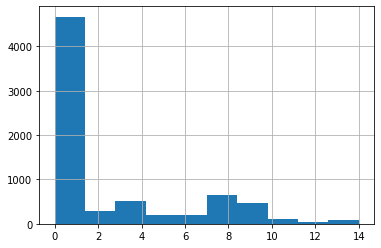

In [75]:
df['Work_Experience'].hist(bins = 10)

print("Mean value of Family size feature is:", df['Work_Experience'].mean())
print("Median value of Family size feature is:", df['Work_Experience'].median())

In [76]:
updated_df = df
updated_df['Work_Experience']=updated_df['Work_Experience'].fillna(updated_df['Work_Experience'].median())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8049 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8049 non-null   object 
 1   Ever_Married     7915 non-null   object 
 2   Age              8049 non-null   int64  
 3   Graduated        7977 non-null   object 
 4   Profession       7936 non-null   object 
 5   Work_Experience  8049 non-null   float64
 6   Spending_Score   8049 non-null   object 
 7   Family_Size      7729 non-null   float64
 8   Var_1            7977 non-null   object 
 9   Segmentation     8049 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 691.7+ KB


__Get the categroical columns__

In [77]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [78]:
catcols = []
for i in df.columns:
  if df[i].dtype == "object":
      catcols.append(i)
catcols 

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']